In [98]:
import numpy as np
import matplotlib.pyplot as plt
from ddeint import ddeint
from scipy.signal import find_peaks
plt.style.use('seaborn')

In [2]:
def logistic_delay(Y,t,d,r,K): 
    x,y = Y(t)
    xd,yd = Y(t-d)
    return np.array([r*x*(1-(xd/K)),0])

# Primero, encontramos soluciones que nos piden

In [73]:
n0 = 2
d = 1
K = 10.0
g = lambda t : np.array([n0,0])
tt = np.linspace(0, 50,num=401,dtype=float)

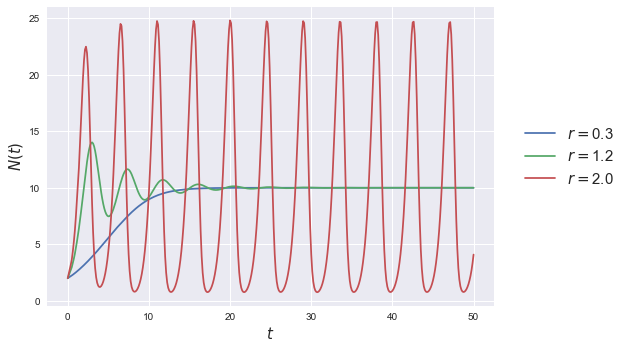

In [74]:
for r in [0.3, 1.2, 2.0]:
    yy = ddeint(logistic_delay,g,tt,fargs=(d,r,K,))
    plt.plot(tt,yy[:,0],label=r'$r=$'+str(r))
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left",fontsize=15)
    plt.xlabel(r'$t$',fontsize=15)
    plt.ylabel(r'$N(t)$',fontsize=15)

# Segundo, que la amplitud es independiente de la condición inicial

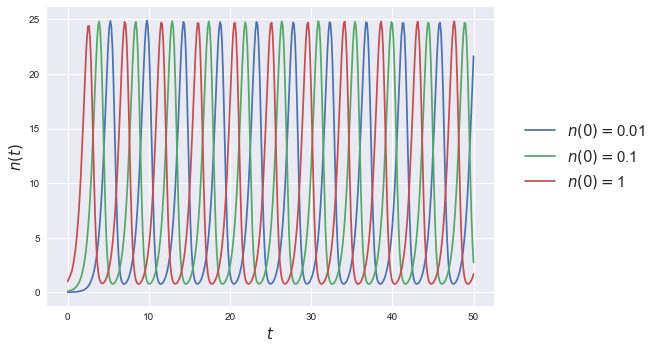

In [80]:
for n0 in [0.01,0.1,1]:
    g = lambda t : np.array([n0,0])
    tt = np.linspace(0, 50,num=401,dtype=float)
    r = 2.0
    d = 1
    K = 10.0
    yy = ddeint(logistic_delay,g,tt,fargs=(d,r,K,))
    plt.plot(tt,yy[:,0],label=r'$n(0)=$'+str(n0))
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left",fontsize=15)
    plt.xlabel(r'$t$',fontsize=15)
    plt.ylabel(r'$n(t)$',fontsize=15)

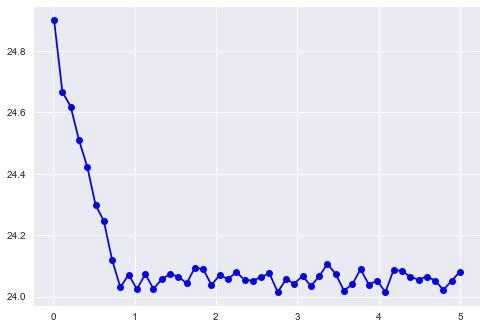

In [97]:
amplitudes = []
for i in list(np.linspace(0.01,5,50)):
    g = lambda t : np.array([i,0])
    tt = np.linspace(0, 50,num=401,dtype=float)
    r = 2.0
    d = 1
    K = 10.0
    yy = ddeint(logistic_delay,g,tt,fargs=(d,r,K,))
    amplitudes.append(max(yy[:,0]-min(yy[:,0])))
plt.plot(list(np.linspace(0.01,5,50)),amplitudes,'-ob')

# Tercero, período independiente de r y aproximadamente = 4T

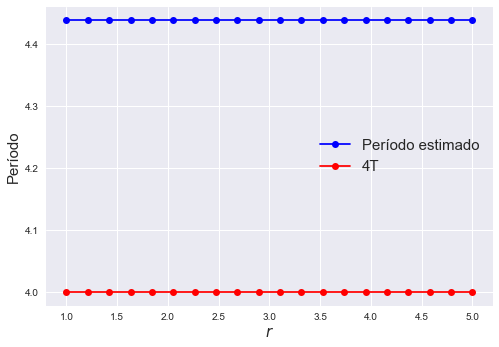

In [149]:
n0 = 0.01
g = lambda t : np.array([n0,0])
tt = np.linspace(0, 50,num=401,dtype=float)
d = 1
K = 10.0
per_r = [] #period as function of r
per_r_teo = [] #period constant for all r's
for r in list(np.linspace(1.0,5.0,20)):
    y = ddeint(logistic_delay,g,tt,fargs=(d,r,K,))
    x = yy[:,0]
    peaks, _ = find_peaks(x, height=0)
    per_r.append(np.mean(np.diff(tt[peaks])))
    per_r_teo.append(4)
plt.plot(list(np.linspace(1.0,5.0,20)),per_r,'-ob',label='Período estimado')
plt.plot(list(np.linspace(1.0,5.0,20)),per_r_teo,'-or',label='4T')
plt.xlabel(r'$r$',fontsize=15)
plt.ylabel('Período',fontsize=15)
plt.legend(fontsize=15)

# Cuarto, vemos la solucion aproximada